In [55]:
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import linalg as LA
import sklearn
from sklearn import metrics
from keras import regularizers
from sklearn import preprocessing


usr_dir="Raw_data/Amp/"
user_file=usr_dir+"U"+str(15)+"_LIHF_itd_file.csv"
dataset=pd.read_csv(user_file,header=None)
array=dataset.values
# normalize the data attributes
#dataframe = preprocessing.normalize(array[])
    

In [56]:
#np.random.shuffle(dataframe)

row_no=array.shape[0]
col_no=array.shape[1]

print(row_no)
print(col_no)
# normalize the data attributes
dataframe = preprocessing.normalize(array[:,0:col_no-1])
print("dataframe row no=",dataframe.shape[0],",dataframe col no=",dataframe.shape[1])
#X_train=dataframe[0:int(row_no*0.6),0:col_no-1]
X_train=dataframe[:,0:col_no-1]
print(X_train.shape)
X_test=dataframe[:,0:col_no-1]
print(X_test)

148
2345
dataframe row no= 148 ,dataframe col no= 2344
(148, 2344)
[[0.3655151  0.10578984 0.09636267 ... 0.         0.         0.        ]
 [0.07429476 0.05215498 0.04737904 ... 0.         0.         0.        ]
 [0.10620044 0.08902307 0.09496605 ... 0.         0.         0.        ]
 ...
 [0.11656937 0.10948562 0.11469501 ... 0.         0.         0.        ]
 [0.18075578 0.11413604 0.11880283 ... 0.         0.         0.        ]
 [0.24163917 0.13134236 0.11899607 ... 0.         0.         0.        ]]


In [57]:
# this is the input size, size of each row. last column is discarded as it represents label
INPUT_SIZE=col_no-1
# this is(16) the size of our encoded representations
ENCODING_SIZE = 10
# this is our input placeholder
input_row = Input(shape=(INPUT_SIZE,))
# "encoded" is the encoded representation of input
encoded = Dense(ENCODING_SIZE, activation='relu')(input_row)
#encoded = Dense(ENCODING_SIZE, activation='relu',activity_regularizer=regularizers.l1(10e-5))(input_row)
# "decoded" is the lossy reconstruction of input
decoded = Dense(INPUT_SIZE, activation='relu')(encoded)
# This model maps an input to its reconstruction
autoencoder = Model(input_row, decoded)
# this model maps an input to its encoded representation
encoder = Model(input_row, encoded)
# create a placeholder for an encoded (16-dimensional) input
encoded_input = Input(shape=(ENCODING_SIZE,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))



In [58]:
# configure our model to use mean_squared_error loss function and adam optimizer function
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

autoencoder_train=autoencoder.fit(X_train, X_train, epochs=50, batch_size=10, shuffle=True, validation_split=0.2)


Train on 118 samples, validate on 30 samples
Epoch 1/50
118/118 [==============================] - 1s 6ms/step - loss: 3.8770e-04 - val_loss: 3.5785e-04
Epoch 2/50
118/118 [==============================] - 0s 732us/step - loss: 3.1301e-04 - val_loss: 2.9830e-04
Epoch 3/50
118/118 [==============================] - 0s 806us/step - loss: 2.5932e-04 - val_loss: 2.5077e-04
Epoch 4/50
118/118 [==============================] - 0s 765us/step - loss: 2.2638e-04 - val_loss: 2.1232e-04
Epoch 5/50
118/118 [==============================] - 0s 775us/step - loss: 2.0546e-04 - val_loss: 1.8165e-04
Epoch 6/50
118/118 [==============================] - 0s 699us/step - loss: 1.8538e-04 - val_loss: 1.6206e-04
Epoch 7/50
118/118 [==============================] - 0s 725us/step - loss: 1.6950e-04 - val_loss: 1.4708e-04
Epoch 8/50
118/118 [==============================] - 0s 772us/step - loss: 1.5744e-04 - val_loss: 1.3485e-04
Epoch 9/50
118/118 [==============================] - 0s 763us/step - loss: 1

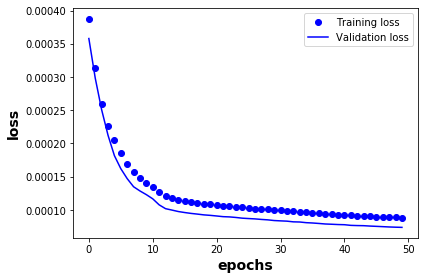

In [59]:
# compute graph for Training loss and validation loss
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
#print(val_loss)
epochs = range(50)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
#plt.title('Training and validation loss')
plt.ylabel('loss',fontsize=14,fontweight='bold')
plt.xlabel('epochs',fontsize=14,fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend()
#plt.show()
plt.tight_layout()
plt.savefig("loss_user_15.jpg")

In [51]:
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
print(val_loss)

[0.0003726755821844563, 0.000353980649379082, 0.00033619863097555935, 0.0003196254401700571, 0.00030390707252081484, 0.00029018305940553546, 0.00027890916680917144, 0.00027006024902220815, 0.00026282164617441595, 0.00025561459187883884, 0.00024715770996408537, 0.00023776577290846035, 0.0002272194469696842, 0.00021686639229301363, 0.00020622221200028434, 0.00019614134362200275, 0.00018562964396551251, 0.00017472610488766804, 0.00016391299868701026, 0.0001559109878144227, 0.00014997823745943606, 0.00014512974303215742, 0.00014000366354594007, 0.00013585011765826494, 0.00013271944408188574, 0.000129407606436871, 0.00012694334873231128, 0.00012423126463545486, 0.00012210224667796865, 0.00011968076796620153, 0.00011755668674595654, 0.00011644894766504876, 0.00011424729018472135, 0.00011263469787081704, 0.00011124525190098211, 0.00010989221482304856, 0.00010756101255537942, 0.00010499978452571668, 0.00010293766899849288, 0.00010202263365499675, 0.00010111015944858082, 9.985032738768496e-05, 

In [19]:
encoded_rows = encoder.predict(X_test)
decoded_rows = decoder.predict(encoded_rows)
distance=metrics.pairwise.cosine_similarity(X_test,decoded_rows)
print(distance)

[[0.91527442 0.72378638 0.64986555 ... 0.68385456 0.70025971 0.87667253]
 [0.59112491 0.8783412  0.87344277 ... 0.87859187 0.87983128 0.44237096]
 [0.49949047 0.82240292 0.84755635 ... 0.84085889 0.83404846 0.37425272]
 ...
 [0.54345188 0.82500389 0.82911247 ... 0.83099666 0.82850387 0.41565026]
 [0.60648914 0.84382908 0.84168379 ... 0.84598101 0.84618472 0.48680076]
 [0.88585114 0.58026781 0.49459365 ... 0.53548948 0.5543622  0.9393833 ]]


In [52]:
# encode and decode some rows
# note that we take them from the *test* set
#X_test1=dataframe[int(row_no*0.6):int(row_no*0.6)+10,0:col_no-1]
#print(X_test1.shape)
encoded_rows = encoder.predict(X_test)
decoded_rows = decoder.predict(encoded_rows)

In [53]:
for i in range(X_test.shape[0]):
    #print(type(X_test1[i]))
    #print(type(decoded_rows[i]))
    dist = LA.norm(X_test[i]-decoded_rows[i])

    print(dist)
    

544.008149398784
50.11506719047272
5003.653228273942
1030.13268262894
33.624907787012866
43.552722252011726
32.62987087478016
56.86730194616345
22.14152604604827
581.7524663282428
41.32666533043563
1111.2619203518072
36.84163966304148
24.655429179590193
60.72336625287602
73.64464302302952
591.0901109044272
65.38990072071223
38.18672427797568
51.17900982285873
84.58138040407958
2505.022795447739
59.68428998581835
44.00327193485972
41.033676197914865
100.08298311780194
48.47957051460061
38.93299769469478
36.105631683359206
32.962322936945554
46.57897777949119
47.2230861163398
238.9395875389281
130.0221827581683
15582.355186205632
62.05111492050253
45.18864261744303
1915.806095548744
187.54188344255684
86.08735678380803
17.272972354745356
77.73498522041245
30.439939616370125
1550.0959059931915
155.4978005192628
2699.9450561592353
29.16376972373581
151.23876276720185
95.72208894423274
90.04193228568559
20.592448742595277
54.57148313114031
180.7681769455159
29.95095245095412
51.420599453167

In [ ]:
decoded_row=autoencoder.predict(X_test)
print(decoded_row)